In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
# from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.linear_model import LogisticRegression
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import learning_curve

In [2]:
# Seleccionar solo las variables numéricas relevantes
datos = pd.read_csv("train.csv", encoding="latin1")
numericas = datos.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

numericas = numericas.dropna()

In [3]:
# Crear variable respuesta que clasifica las casas en Económicas, Intermedias o Caras
terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]
numericas["Clase"] = pd.cut(numericas["SalePrice"], bins=[0, limite_economicas, limite_caras, float("inf")], labels=["Económicas", "Intermedias", "Caras"])

In [4]:
dummies = pd.get_dummies(numericas['Clase'])
datos = pd.concat([numericas,dummies], axis=1)
economica = datos.pop("Económicas") 
intermedias = datos.pop("Intermedias")
caras = datos.pop("Caras")
datos.pop("Clase")

0             Caras
1       Intermedias
2             Caras
3       Intermedias
4             Caras
           ...     
1455    Intermedias
1456          Caras
1457          Caras
1458    Intermedias
1459    Intermedias
Name: Clase, Length: 1195, dtype: category
Categories (3, object): ['Económicas' < 'Intermedias' < 'Caras']

# 7 & 8. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.

In [5]:
X = datos
y = caras
random.seed(42)

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

modelo1 = Sequential()
modelo1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelo1.add(Dense(32, activation='relu'))
modelo1.add(Dense(3, activation='softmax'))
modelo1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

modelo2 = Sequential() 
modelo2.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid')) 
modelo2.add(Dense(3, activation='softmax')) 
modelo2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
modelo2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
30/30 [==============================] - 1s 6ms/step - loss: 1921.1898 - accuracy: 0.5513 - val_loss: 490.5832 - val_accuracy: 0.6527
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 115.8622 - accuracy: 0.7186 - val_loss: 100.7121 - val_accuracy: 0.8159
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 36.7844 - accuracy: 0.8431 - val_loss: 61.0129 - val_accuracy: 0.8368
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 18.7175 - accuracy: 0.8703 - val_loss: 53.2538 - val_accuracy: 0.7364
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 27.4437 - accuracy: 0.7751 - val_loss: 27.2289 - val_accuracy: 0.9121
Epoch 6/50
30/30 [==============================] - 0s 1ms/step - loss: 6.3969 - accuracy: 0.9069 - val_loss: 22.8463 - val_accuracy: 0.8452
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 4.3625 - accuracy: 0.9184 - val_loss: 5.7923 - val_accuracy: 0.9121
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.6768 - val_loss: 0.6601 - val_accuracy: 0.6527
Epoch 9/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.6768 - val_loss: 0.6466 - val_accuracy: 0.6527
Epoch 10/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.6768 - val_loss: 0.6464 - val_accuracy: 0.6527
Epoch 11/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6314 - accuracy: 0.6768 - val_loss: 0.6489 - val_accuracy: 0.6527
Epoch 12/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6768 - val_loss: 0.6469 - val_accuracy: 0.6527
Epoch 13/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6768 - val_loss: 0.6428 - val_accuracy: 0.6527
Epoch 14/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6300 - accuracy: 0.6768 - val_loss: 0.6445 - val_accuracy: 0.6527
Epoch 15/50
30/30 [=======

In [6]:
# Define diferentes tamaños de conjunto de entrenamiento
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

# Definir una función para entrenar y evaluar el modelo para cada tamaño de conjunto de entrenamiento
def plot_learning_curve(modelo, X_train, y_train, X_test, y_test):
    train_scores = []
    test_scores = []
    for train_size in train_sizes:
        # Dividir los datos en conjuntos de entrenamiento y validación para el tamaño actual
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
        
        # Entrenar el modelo con el subconjunto de entrenamiento actual
        modelo.fit(X_train_subset, y_train_subset, epochs=50, batch_size=32, verbose=0)
        
        # Evaluar la precisión en el subconjunto de entrenamiento actual
        train_loss, train_acc = modelo.evaluate(X_train_subset, y_train_subset, verbose=0)
        train_scores.append(train_acc)
        
        # Evaluar la precisión en el conjunto de validación
        test_loss, test_acc = modelo.evaluate(X_test, y_test, verbose=0)
        test_scores.append(test_acc)
    
    # Graficar la curva de aprendizaje
    plt.plot(train_sizes, train_scores, 'o-', label='Training')
    plt.plot(train_sizes, test_scores, 'o-', label='Validation')
    plt.xlabel('Training size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

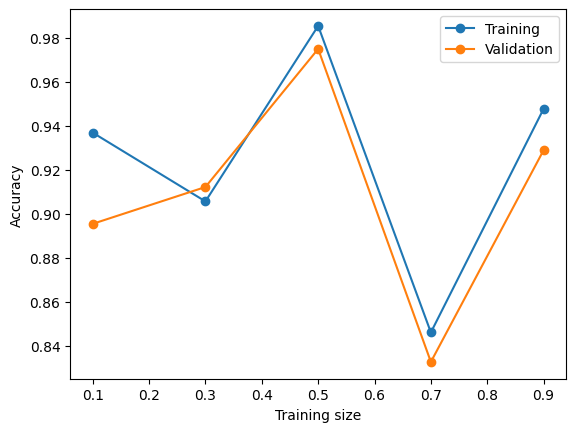

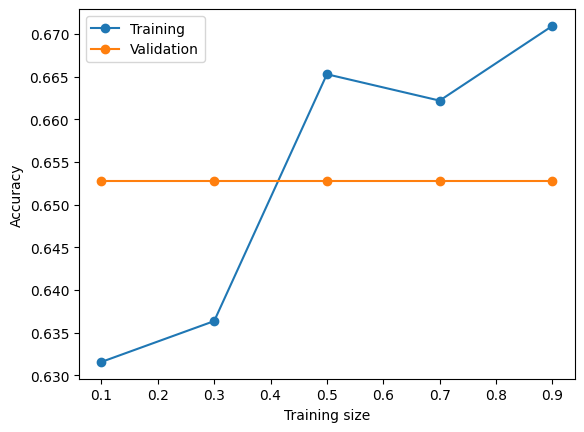

In [7]:
# Aplicar la función a los modelos que has creado
plot_learning_curve(modelo1, X_train, y_train, X_test, y_test)
plot_learning_curve(modelo2, X_train, y_train, X_test, y_test)

# 9. Seleccione ahora el SalesPrice como variable respuesta.

In [8]:
y = numericas["SalePrice"]

# 10. Genere dos modelos de regresión con redes neuronales con diferentes topologías y funciones de activación para predecir el precio de las casas.

In [16]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical

# Seleccionar solo las variables numéricas relevantes
datos = pd.read_csv("train.csv", encoding="latin1")
numericas = datos.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

# Eliminación de datos faltantes
numericas = numericas.dropna()

# Definición de variables de entrada (X) y de salida (y)
X = numericas.drop("SalePrice", axis=1)
y = numericas["SalePrice"]

In [17]:
# Creación del modelo
modelo1 = Sequential()
modelo1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelo1.add(Dense(32, activation='relu'))
modelo1.add(Dense(3, activation='softmax'))

# Compilación del modelo
modelo1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
history1 = modelo1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
30/30 [==============================] - 1s 5ms/step - loss: 3765.6826 - accuracy: 0.5377 - val_loss: 946.1068 - val_accuracy: 0.4686
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 499.7470 - accuracy: 0.6255 - val_loss: 563.3775 - val_accuracy: 0.5439
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 301.6923 - accuracy: 0.6255 - val_loss: 455.9357 - val_accuracy: 0.5732
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 227.6054 - accuracy: 0.6757 - val_loss: 301.2075 - val_accuracy: 0.7406
Epoch 5/50
30/30 [==============================] - 0s 1ms/step - loss: 225.2206 - accuracy: 0.6433 - val_loss: 243.4265 - val_accuracy: 0.7573
Epoch 6/50
30/30 [==============================] - 0s 1ms/step - loss: 163.5605 - accuracy: 0.7008 - val_loss: 334.7741 - val_accuracy: 0.6736
Epoch 7/50
30/30 [==============================] - 0s 1ms/step - loss: 128.3719 - accuracy: 0.7678 - val_loss: 136.3981 - val_accuracy

In [18]:
# Creación del modelo
modelo2 = Sequential() 
modelo2.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid')) 
modelo2.add(Dense(3, activation='softmax'))

# Compilación del modelo
modelo2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
history2 = modelo2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
30/30 [==============================] - 0s 5ms/step - loss: 0.7233 - accuracy: 0.6642 - val_loss: 0.6742 - val_accuracy: 0.6527
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.6768 - val_loss: 0.6538 - val_accuracy: 0.6527
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.6768 - val_loss: 0.6519 - val_accuracy: 0.6527
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6362 - accuracy: 0.6768 - val_loss: 0.6527 - val_accuracy: 0.6527
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.6768 - val_loss: 0.6505 - val_accuracy: 0.6527
Epoch 6/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.6768 - val_loss: 0.6497 - val_accuracy: 0.6527
Epoch 7/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.6768 - val_loss: 0.6559 - val_accuracy: 0.6527
Epoch 8/50
30/30 [==

# 11. Compare los dos modelos de regresión y determine cuál funcionó mejor

In [21]:
# Obtener las probabilidades de pertenecer a cada clase
y_pred1 = modelo1.predict(X_test)
y_pred2 = modelo2.predict(X_test)

8/8 [==============================] - 0s 709us/step


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE y R² del modelo 1
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

# Calcular el MSE y R² del modelo 2
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Modelo 1 - MSE: ", mse1)
print("Modelo 1 - R²: ", r2_1)

print("Modelo 2 - MSE: ", mse2)
print("Modelo 2 - R²: ", r2_2)

Modelo 1 - MSE:  0.02510456
Modelo 1 - R²:  0.889249487993481
Modelo 2 - MSE:  0.15471917
Modelo 2 - R²:  -0.015887562758740332


# 12. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.

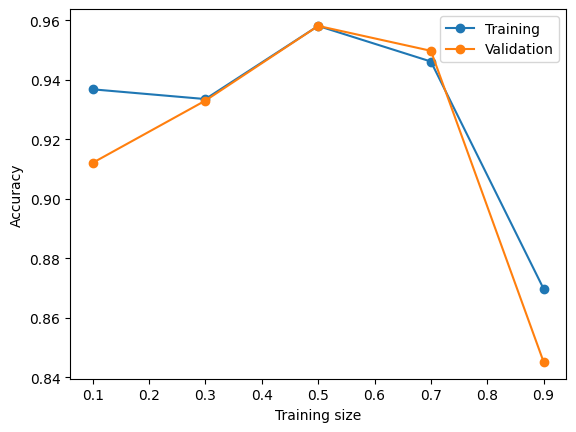

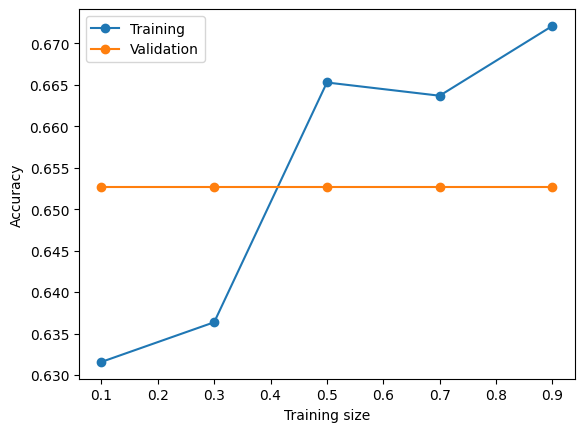

In [23]:
# Aplicar la función a los modelos que has creado
plot_learning_curve(modelo1, X_train, y_train, X_test, y_test)
plot_learning_curve(modelo2, X_train, y_train, X_test, y_test)